In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# note: using python3 kernels and packages

In [8]:
# the csv contains data for Ulaanbaatar from late 2015 to early 2018
df = pd.read_csv('mn-ub-2018-1.csv.gz', compression='gzip')
df = df[['date', 'location', 'parameter', 'value']]
df.columns = ['date', 'location', 'parameter', 'value']
df = df[(df['value'] >= 0) & (df['parameter'] == 'pm25')]

In [9]:
df = df.set_index('date')
df.index = pd.to_datetime(df.index)

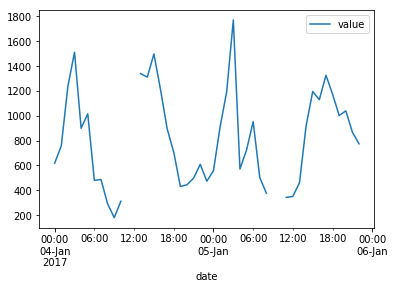

In [10]:
# test
df2 = df[df['parameter'] == 'pm25']
df2 = df2[df2['location'] == 'Bayankhoshuu']
df2 = df2.loc['2017-01-04':'2017-01-05']
df2 = df2.resample('H').mean()
df2.plot()

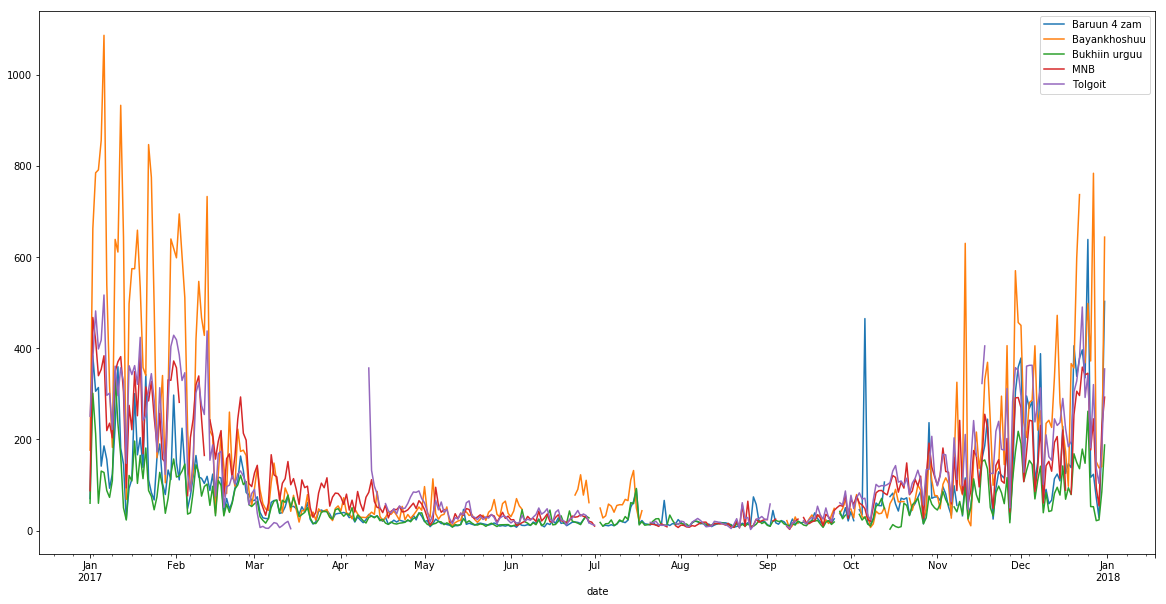

In [11]:
# daily means of 5 locations in 2017
locations = df.location.unique()[:5]
data = {}
df17 = df.loc['2017-01-01':'2017-12-31']
for location in locations:
    loc_data = df17[(df17['location'] == location)]
    data[location] = pd.Series(loc_data['value'], index=loc_data.index)
df17m = pd.DataFrame(data)
df17m = df17m.resample('D').mean()
df17m.plot(figsize=(20,10))

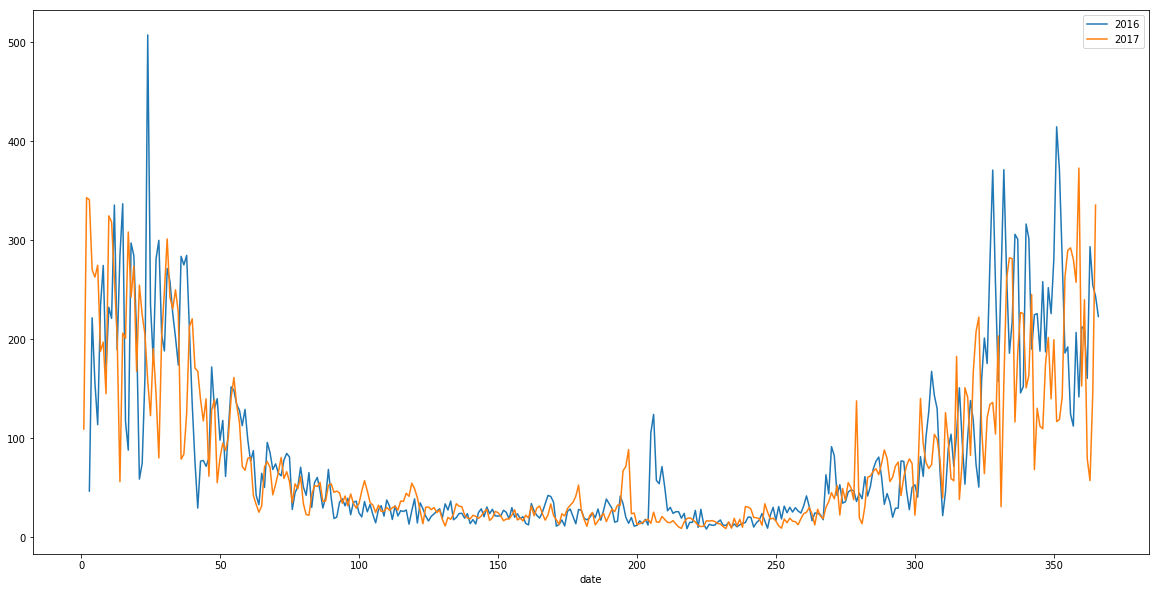

In [13]:
# daily means of the city in 2016 and 2017
data = {}
df16 = df.loc['2016-01-01':'2016-12-31']
df16 = df16.resample('D').mean()
df17 = df.loc['2017-01-01':'2017-12-31']
df17 = df17.resample('D').mean()
df2years = pd.DataFrame({
    '2016': pd.Series(df16['value'].values, index=df16.index.dayofyear),
    '2017': pd.Series(df17['value'].values, index=df17.index.dayofyear)
})
df2years.plot(figsize=(20,10))